In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/Bank Customer Churn Prediction.csv')


In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.describe()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.isnull().sum()


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [9]:
df.drop(columns=['customer_id'],inplace=True,axis=1)


In [10]:
df.head()


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df=pd.get_dummies(df,columns=['country','gender'],drop_first=True)


In [12]:
X=df.drop(columns='churn')
y=df['churn'].values


In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.fit_transform(X_test)

In [16]:
X_train_trf


array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model=Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [21]:
history=model.fit(X_train_trf, y_train, batch_size=50, epochs=125,verbose=1, validation_split=0.25)


Epoch 1/125
120/120 [==============================] - 2s 7ms/step - loss: 0.5501 - accuracy: 0.7925 - val_loss: 0.4995 - val_accuracy: 0.7995
Epoch 2/125
120/120 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.7948 - val_loss: 0.4860 - val_accuracy: 0.7995
Epoch 3/125
120/120 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.7948 - val_loss: 0.4740 - val_accuracy: 0.7995
Epoch 4/125
120/120 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7948 - val_loss: 0.4606 - val_accuracy: 0.7995
Epoch 5/125
120/120 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.7948 - val_loss: 0.4489 - val_accuracy: 0.7995
Epoch 6/125
120/120 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7953 - val_loss: 0.4407 - val_accuracy: 0.8005
Epoch 7/125
120/120 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.8030 - val_loss: 0.4360 - val_accuracy: 0.8135

In [22]:
y_pred=model.predict(X_test_trf)


63/63 [==============================] - 0s 1ms/step


In [23]:
y_pred


array([[0.25834087],
       [0.26491863],
       [0.09311781],
       ...,
       [0.08924477],
       [0.10545247],
       [0.25180364]], dtype=float32)

In [24]:
from sklearn.metrics import accuracy_score


In [25]:
y_pred = y_pred.argmax(axis=-1)


In [26]:
accuracy_score(y_test,y_pred)


0.7975

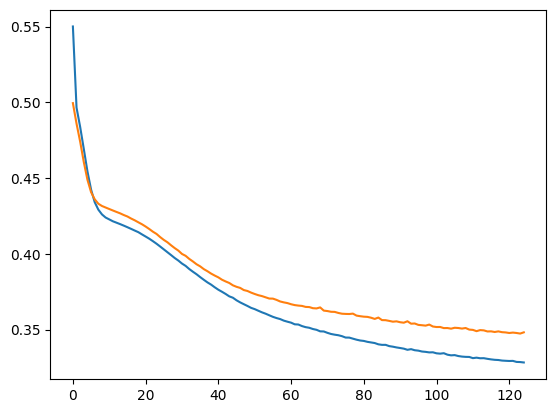

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

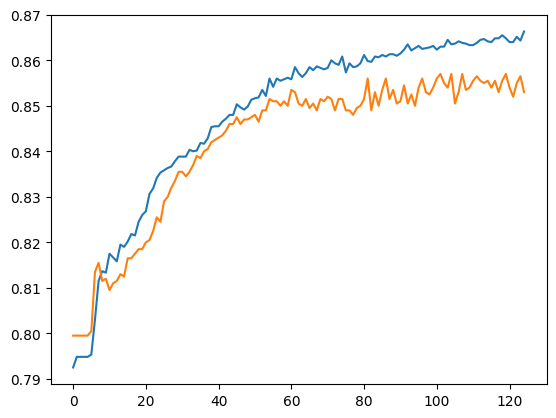

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])